In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
g_play= pd.read_csv('D:\Data Analysis\googleplay\googleplaystore_user_reviews.csv')
google_play=pd.DataFrame(g_play)
google_play.head(6)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [2]:
google_play['Sentiment'].value_counts()


Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

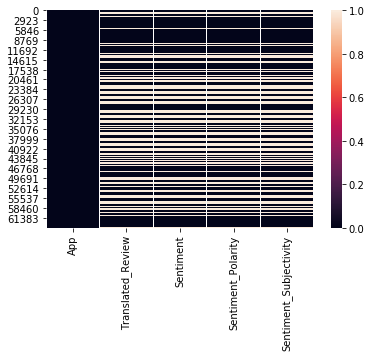

In [4]:
sns.heatmap(google_play.isna())


In [5]:
google_play=google_play.dropna()
google_play.shape

(37427, 5)

In [6]:
google_play.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [7]:
google_play.loc[google_play["Sentiment"]=='Positive',"Sentiment"]=1
google_play.loc[google_play["Sentiment"]=='Negative',"Sentiment"]=0
google_play.loc[google_play["Sentiment"]=='Neutral',"Sentiment"]=2

In [8]:
google_play.head(10)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,1,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,1,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,1,0.40,0.875000
4,10 Best Foods for You,Best idea us,1,1.00,0.300000
5,10 Best Foods for You,Best way,1,1.00,0.300000
6,10 Best Foods for You,Amazing,1,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",2,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,2,0.00,0.000000
10,10 Best Foods for You,good you.,1,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,1,0.20,0.100000


In [9]:
X=google_play["Translated_Review"]
y=google_play["Sentiment"]

In [10]:
print(X.shape)
print(y.shape)

(37427,)
(37427,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print("The number of data points used in  training model is %d "%(X_train.shape[0]))
print("The number of data points used in testing model is %d" %(X_test.shape[0]))


(26198,)
(11229,)
(26198,)
(11229,)
The number of data points used in  training model is 26198 
The number of data points used in testing model is 11229


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
vect = CountVectorizer()


In [16]:
vect.fit(X_train)
X_train_dtm=vect.transform(X_train)
X_train_dtm

<26198x18479 sparse matrix of type '<class 'numpy.int64'>'
	with 407767 stored elements in Compressed Sparse Row format>

In [17]:
X_train_dtm=vect.fit_transform(X_train)
X_train_dtm

<26198x18479 sparse matrix of type '<class 'numpy.int64'>'
	with 407767 stored elements in Compressed Sparse Row format>

In [18]:
X_test_dtm=vect.transform(X_test)
X_test_dtm

<11229x18479 sparse matrix of type '<class 'numpy.int64'>'
	with 171777 stored elements in Compressed Sparse Row format>

Use Naive Bayes Algorithm


In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
nb=MultinomialNB()

In [22]:
%time nb.fit(X_train_dtm,y_train) 

Wall time: 59 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
y_pred_class=nb.predict(X_test_dtm)

In [24]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred_class)

0.7797666755721792

In [25]:
metrics.confusion_matrix(y_test,y_pred_class)

array([[1759,  741,   25],
       [ 433, 6684,   39],
       [ 211, 1024,  313]], dtype=int64)

# Use Logistic Regerression

In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
logreg = LogisticRegression()


In [28]:
logreg.fit(X_train_dtm,y_train)


C:\Users\SUMIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SUMIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
y_pred=logreg.predict(X_test_dtm)


In [30]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2119,  292,  114],
       [ 171, 6902,   83],
       [  56,   80, 1412]], dtype=int64)

In [31]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9291121204025292

According to Both Algorithm Accuracy is Much Better in Logistic Regression